In [1]:
import numpy as np
import pandas as pd
from tsne import *
import matplotlib.pyplot as plt

In [2]:
def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 800
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    # P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    Cs = []
    
    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        C = np.sum(P * np.log(P / Q))
        if (iter + 1) % 10 == 0:
            print("Iteration %d: error is %f" % (iter + 1, C))
        Cs.append(C)

        # Stop lying about P-values
        # if iter == 100:
        #     P = P / 4.

    # Return solution
    return Y, Cs


In [3]:
directory = "./"

train_data = pd.read_csv(directory+'train.csv')
test_data = pd.read_csv(directory+'test.csv')

train_x = train_data.drop(['id', 'label'], axis = 1).values
train_y = train_data['label'].values
test_x = test_data.drop(['id', 'label'], axis=1).values
test_y = test_data['label'].values

In [4]:
# print(train_x.shape)
# print(test_x.shape)
# print(train_y)

train_x = np.where(train_x >= 127, 1, 0)
test_x = np.where(test_x >= 127, 1, 0)
# print(h_choices[0, np.arange(10)])

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# a = np.random.randn(10)
# print(a)
# print(sigmoid(a/2 -1))

# print(np.outer(np.arange(5), np.arange(10)))

100 1e-07 1
Done


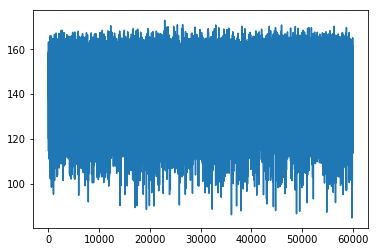

(10000, 100)
[0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1]
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2500...
Computing P-values for point 500 of 2500...
Computing P-values for point 1000 of 2500...
Computing P-values for point 1500 of 2500...
Computing P-values for point 2000 of 2500...
Mean value of sigma: 1.071923
Iteration 10: error is 4.204423
Iteration 20: error is 3.690497
Iteration 30: error is 3.072045
Iteration 40: error is 2.787571
Iteration 50: error is 2.654125
Iteration 60: error is 2.568500
Iteration 70: error is 2.505986
Iteration 80: error is 2.455413
Iteration 90: error is 2.411706
Iteration 100: error is 2.374779
Iteration 110: error is 2.341708
Iteration 120: error is 2.313895
Iteration 130: error is 2.289824
Iteration 140: error is 2.269782
Iteration 1

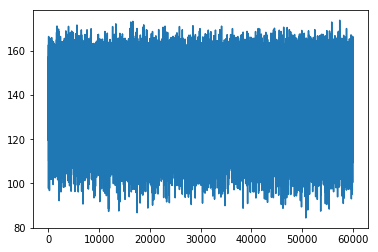

(10000, 100)
[1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0]
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2500...
Computing P-values for point 500 of 2500...
Computing P-values for point 1000 of 2500...
Computing P-values for point 1500 of 2500...
Computing P-values for point 2000 of 2500...
Mean value of sigma: 1.091643
Iteration 10: error is 4.226551
Iteration 20: error is 3.712732
Iteration 30: error is 3.061172
Iteration 40: error is 2.762362
Iteration 50: error is 2.615980
Iteration 60: error is 2.523041
Iteration 70: error is 2.454491
Iteration 80: error is 2.400502
Iteration 90: error is 2.355651
Iteration 100: error is 2.317591
Iteration 110: error is 2.284506
Iteration 120: error is 2.255588
Iteration 130: error is 2.228297
Iteration 140: error is 2.204582
Iteration 1

<Figure size 432x288 with 0 Axes>

In [6]:
# h_ns = [50, 150]
# lrs = [.000001, 0.0000001, .00000001]
# ks = [1, 3, 5, 10, 20]

h_ns = [100]
lrs = [0.0000001]
ks = [1, 5]
for k in ks:
    for h_n in h_ns:
        for learning_rate in lrs:
            print(h_n, learning_rate, k)
    #         h_n = 100
            v_m = 784

            W = np.random.randn(h_n, v_m)
            b = np.random.randn(v_m)-2
            c = np.random.randn(h_n)-2
#             k = 10
    #         learning_rate = .00000001

            norms = []

            for x in train_x:

                v_t = np.copy(x)
                h_t = np.zeros(h_n)

                for _ in range(k):
            #         for i in range(h_n):
                    pro_samples = np.random.rand(h_n)
                    probs = sigmoid(np.matmul(W, v_t) + c)
                    h_t = np.where(probs < pro_samples, 1, 0)

                    pro_samples = np.random.rand(v_m)
                    probs = sigmoid(np.matmul(h_t.T, W) + b)
                    v_t = np.where(probs < pro_samples, 1, 0)

                update_c_by_vd = sigmoid(np.matmul(W, x) + c)
                update_c_by_vt = sigmoid(np.matmul(W, v_t) + c)
            #     print(update_c_by_vd.shape)
            #     print(update_c_by_vd.T)a
                update_W_by_vd = np.outer(update_c_by_vd, x)
                update_W_by_vt = np.outer(update_c_by_vt, v_t)
            #     print(update_W_by_vd.shape)

                norms.append(np.linalg.norm(update_W_by_vd - update_W_by_vt)+ \
                             np.linalg.norm(x - v_t) + \
                             np.linalg.norm(update_c_by_vd - update_c_by_vt))

                W = W + learning_rate * (update_W_by_vd - update_W_by_vt)
                b = b + learning_rate * (x - v_t)
                c = c + learning_rate * (update_c_by_vd - update_c_by_vt)
            #     input()

            print("Done")
            plt.plot(norms)
            plt.show()
            plt.clf()

            probs = sigmoid(np.matmul(test_x, W.T) + c)
            pro_samples = np.random.rand(test_x.shape[0], h_n)

            hidden_rep = np.where(probs < pro_samples, 1, 0)
#             hidden_rep = probs

            print(hidden_rep.shape)
            print(hidden_rep[np.random.randint(0, test_x.shape[0])])

            hidden_rep = hidden_rep[:2500]
            test_y = test_y[:2500]

            Y, Cs= tsne(hidden_rep, 2, h_n, 20.0)
            Cs = np.array(Cs)
#             fig, ax = plt.subplots(figsize=(8,8))
#             for g in np.unique(test_y):
#                 i = np.where(test_y == g)
#                 ax.scatter(Y[i,0], Y[i,1], label=int(g))
#             plt.title("t-SNE on "+str(h_n)+"-dimensional hidden representation")
#             plt.legend()
#             plt.savefig(directory+"clusters_"+str(h_n)+"_"+str(learning_rate).replace('.','')+"_"+str(k)+".png")
#             plt.show()
#             plt.clf()
            print(Cs.shape)
            np.save("error_"+str(k)+".npy", Cs)